In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost, shap, math

# load JS visualization code to notebook
shap.initjs()

# Boston Dataset

In [2]:
X,y = shap.datasets.boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [3]:
X_train.shape

(379, 13)

## Using & Training separate models (Random Forest & XGBoost)

In [4]:
%time rf_model = RandomForestRegressor().fit(X_train, y_train)

CPU times: user 45.9 ms, sys: 2.7 ms, total: 48.6 ms
Wall time: 48.5 ms


In [5]:
%time xg_model = xgboost.train({"learning_rate": 0.01}, \
                               xgboost.DMatrix(X_train, label=y_train), 100)

[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[17:18:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

## Creating explainers & shap values for separate models

In [6]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
xg_explainer = shap.TreeExplainer(xg_model)
%time xg_shap_values = xg_explainer.shap_values(X)

CPU times: user 279 ms, sys: 1.11 ms, total: 280 ms
Wall time: 72.7 ms


In [7]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
rf_explainer = shap.TreeExplainer(rf_model)
%time rf_shap_values = rf_explainer.shap_values(X)

CPU times: user 887 ms, sys: 29 ms, total: 916 ms
Wall time: 474 ms


## Individual Predictions

In [8]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(xg_explainer.expected_value, xg_shap_values[25,:], X.iloc[25,:])

In [9]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(rf_explainer.expected_value, rf_shap_values[25,:], X.iloc[25,:])

## Range Predictions

In [10]:
# visualize the training set predictions
shap.force_plot(xg_explainer.expected_value, xg_shap_values, X)

In [11]:
# visualize the training set predictions
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X)

## Dependence Plots

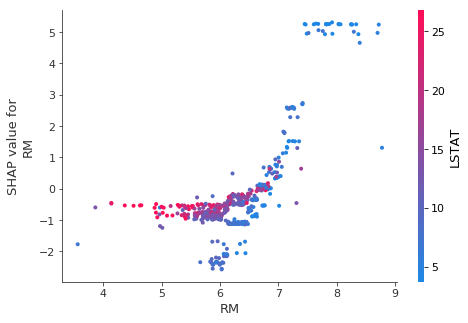

In [12]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", xg_shap_values, X)

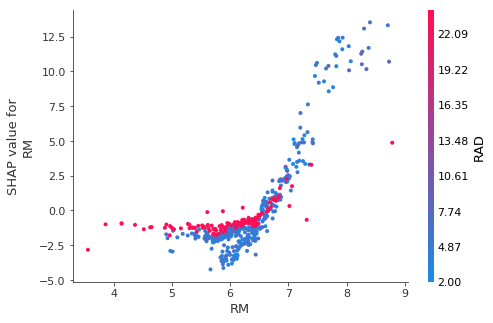

In [13]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", rf_shap_values, X)

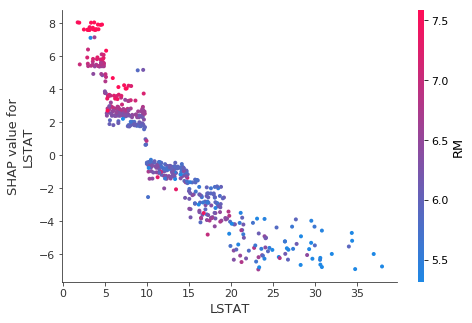

In [14]:
shap.dependence_plot("LSTAT", xg_shap_values, X)

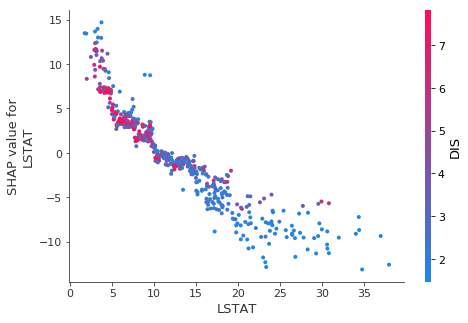

In [15]:
shap.dependence_plot("LSTAT", rf_shap_values, X)

## Summary Plots

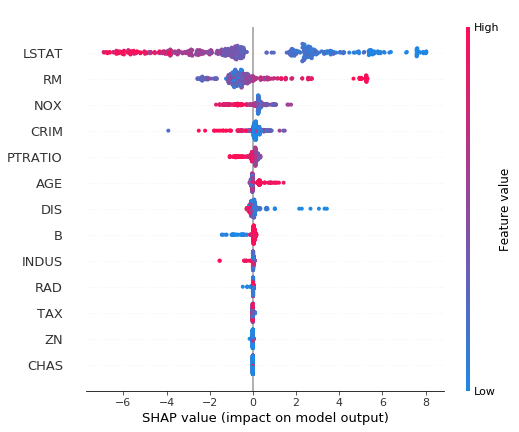

In [16]:
# summarize the effects of all the features
shap.summary_plot(xg_shap_values, X)

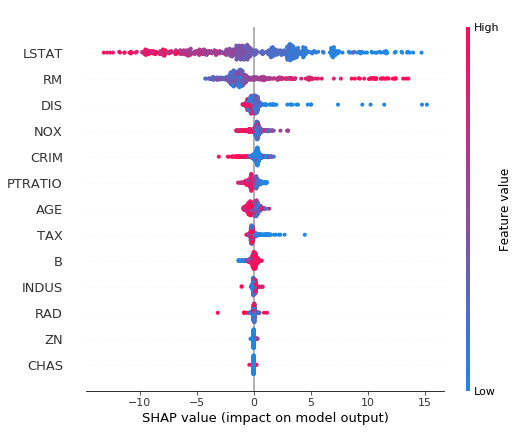

In [17]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X)

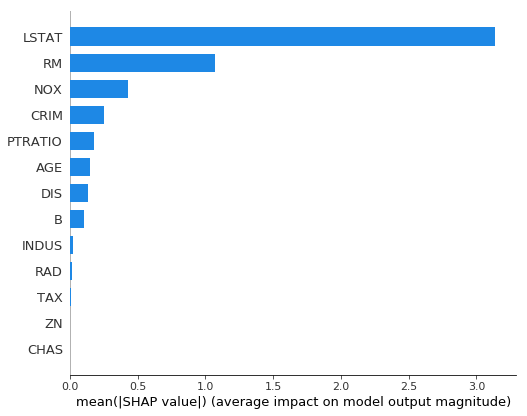

In [18]:
# summarize the effects of all the features
shap.summary_plot(xg_shap_values, X,plot_type='bar')

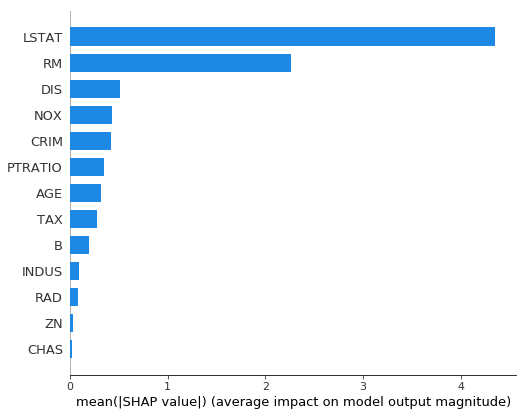

In [19]:
# summarize the effects of all the features
shap.summary_plot(rf_shap_values, X,plot_type='bar')

# Kaggle Black Friday Sales Dataset

## Data Import & Process

In [20]:
data = pd.read_csv('BlackFriday.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [22]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [23]:
df = data.fillna(0).copy()

In [24]:
cat_cols = df.select_dtypes('object').columns
df[cat_cols] = df[cat_cols].apply(lambda x:x.astype('category').cat.codes)

In [25]:
df.Purchase.mean()

9333.859852635065

In [26]:
df['above_avg'] = np.where(df['Purchase']>=9333, 1, 0)

In [27]:
y = df['above_avg']
X = df.drop(['above_avg','Purchase'],axis=1).copy()

In [28]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Instantiate and Train Model

In [29]:
%time my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

CPU times: user 13.1 s, sys: 346 ms, total: 13.5 s
Wall time: 11.1 s


In [30]:
val_X.iloc[5,:]

User_ID                       1004808.0
Product_ID                         31.0
Gender                              1.0
Age                                 3.0
Occupation                          0.0
City_Category                       0.0
Stay_In_Current_City_Years          1.0
Marital_Status                      1.0
Product_Category_1                  8.0
Product_Category_2                 15.0
Product_Category_3                  0.0
Name: 186739, dtype: float64

In [31]:
single_prediction = val_X.iloc[5,:].values.reshape(1,-1)
single_prediction

array([[1.004808e+06, 3.100000e+01, 1.000000e+00, 3.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00,
        8.000000e+00, 1.500000e+01, 0.000000e+00]])

In [32]:
my_model.predict_proba(single_prediction)

array([[0.8, 0.2]])

# Instantiate Explainer

In [33]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

## Single Predictions

In [34]:
%time shap_values = explainer.shap_values(single_prediction)

CPU times: user 527 ms, sys: 5.43 ms, total: 533 ms
Wall time: 485 ms


In [35]:
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[5,:])

## Various Predictions

In [36]:
%time shap_values = explainer.shap_values(val_X.iloc[:1000,:])

CPU times: user 7min 54s, sys: 5.23 s, total: 7min 59s
Wall time: 8min 6s


In [37]:
shap.force_plot(explainer.expected_value[1], shap_values[1], val_X.iloc[:1000,:])

In [38]:
import matplotlib.pyplot as plt

def feature_means(df,feature,label):
    means = {}
    vals = np.sort(df[feature].unique())
    for val in vals:
        val_mean = df[df[feature] == val][label].mean()
        means[val]=val_mean
    
    fig = plt.figure()
    x = np.linspace(1,len(means),len(means))
    plt.bar(means.keys(),means.values())
    plt.xticks(x)
    plt.show()

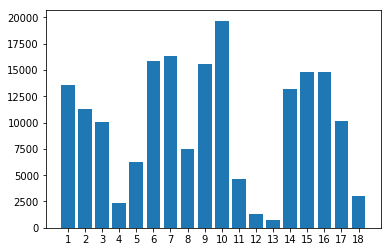

In [39]:
feature_means(df,'Product_Category_1','Purchase')

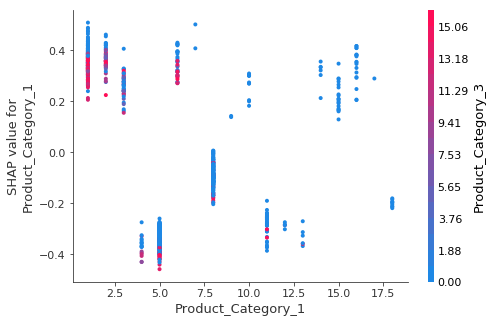

In [40]:
shap.dependence_plot("Product_Category_1",shap_values[1],val_X.iloc[:1000,:])

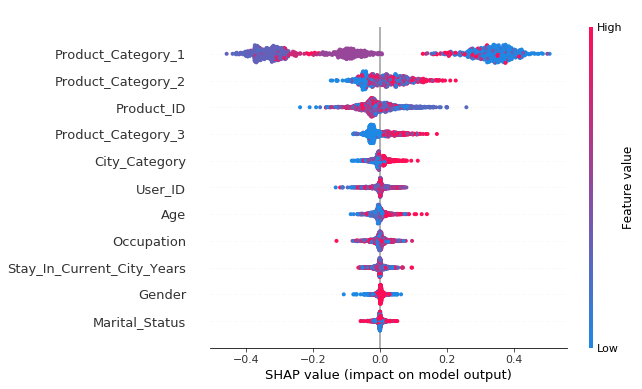

In [41]:
shap.summary_plot(shap_values[1],val_X.iloc[:1000,:])

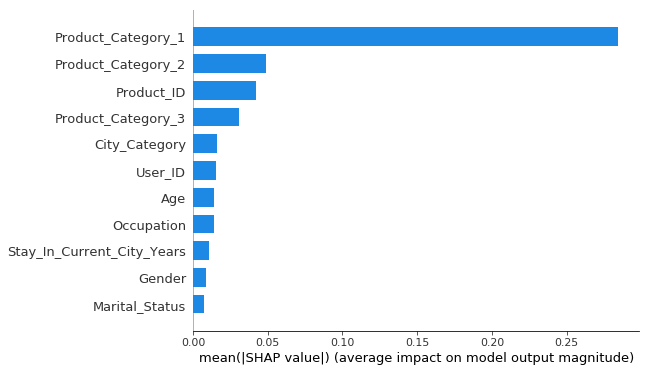

In [42]:
shap.summary_plot(shap_values[1],val_X.iloc[:1000,:],plot_type="bar")